# 1. Geometric modeling 

The __geometric model__ of a robot is a set of equations describing the robot's geometry. This enables for instance to calculate the end-effector's position in the workspace based on the joint angles. There are 2 kinds of geometric models:

- __Direct Geometric Model (DGM)__ : given joint positions, it gives the position of the end-effector (tool, hand, foot, etc.) with respect to the robot's base 

- __Inverse Geometric Model (IGM)__ : given an end-effector position (and orientation), it gives the joint positions 

The joint positions are usually denoted by $q$ and belong to __joint space__. The end-effector's pose is denoted $p$ and belongs to the __task space__, or cartesian space. The geometric model is in fact a mapping between the joint space and the task space. We will introduce these concepts more concretely with examples.

__Note__: This Notebook contains trigonometry formulas. Take a look at this [cheatsheet](https://tutorial.math.lamar.edu/pdf/trig_cheat_sheet_reduced.pdf) if you feel lost.

# 1R robot

Consider the simple robot arm consisting of 1 revolute joint and 1 link. 

In [10]:
## Author: Sebastien
## Date : 22/06/2020

# Import required packages for this notebook
import numpy as np
from matplotlib import pyplot as plt
import IPython
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

# If full github repo has been downloaded locally, uncomment these lines
# from IPython.display import Image
# Image("1dof.png")

# Otherwise click on the link below to see the figure

<!-- For Colab NB -->
[1R robot (click here)](https://drive.google.com/file/d/1aSBG3kNHr6wBTUF9SetZ0xkq7uHdxFpx/view?usp=sharing)

One way to describe the robot configuration is to use the joint angle $q\in[-\pi,\pi]$. Knowing $q$, the DGM enables to determine the end-effector's position $p=(x_p,y_p)$ with respect to a fixed reference coordinate frame attached to the base. In this case: the joint space is then the interval $[-\pi,\pi]$ and the task space is the cartesian plane $\mathbb{R}^2$. The DGM equations are

$$
x_p = L \cos(q) \\
y_p = L \sin(q)
$$

where $(x_p,y_p)$ are the cartesian coordinates of the end-effector and $L$ is the length of the link. The same equations can be expressed more compactly as 

$$
p = DGM(q)
$$

where $DGM$ is a function taking a joint angle $q$ as an input and outputs a cartesian position $p=(x_p,y_p)$ expressed in the base frame. It is implemented in python as follow

In [11]:
# Define the link length
L = 1.

# Function corresponding to the direct geometric model
def DGM(q):
    '''
    Input : joint angle (in rad)
    Output : end-effector position (in m)
    '''
    
    x_p = L*np.cos(q)
    y_p = L*np.sin(q)
    
    p = np.array([x_p, y_p])
    
    return p

# Test the DGM and display the result
q = 1.7
p = DGM(q)
print("The end-effector position corresponding to q = "+str(q)+" is : p = "+str(p))

The end-effector position corresponding to q = 1.7 is : p = [-0.12884449  0.99166481]


The IGM solves the converse problem: given an end-effector position (task space), it returns the corresponding position. The IGM is derived by inverting the DGM equations, i.e. by expressing $q$ in terms of $p$. Recall the DGM

$$
x_p = L cos(q) \\
y_p = L sin(q)
$$

Assuming $cos(q) \neq 0$ we can divide the second equation by the first equation

$$
\frac{y_p}{x_p} = \frac{\sin(q)}{\cos(q)} = \tan(q)\\
$$

Therefore the IGM reads

$$
q = tan^{-1}(\frac{y_p}{x_p})
$$

The following function implements the IGM (we use the arctan2 function https://en.wikipedia.org/wiki/Atan2).

In [12]:
# Function corresponding to the inverse geometric model
def IGM(p):
    '''
    Input : end-effector position (in m)
    Output : joint angle (in rad)
    '''
    
    x_p = p[0]
    y_p = p[1]
    
    q = np.arctan2(y_p, x_p)
    
    return q

# Test the DGM and display the result
p = np.array([0.3, 0.5])
q = IGM(p)
print("The joint position corresponding to p = "+str(p)+" is : q = "+str(q))

The joint position corresponding to p = [0.3 0.5] is : q = 1.0303768265243125


__Question__ : For which value(s) $q$ do we have $cos(q) = 0$ ? In this case, can we still use the IGM we derived previously in order to calculate $q$ ? 

Now we summarize the geometric model of the 1R robot into a python class

In [13]:
# Class for the geometric model of the 2R robot
class GeometricModel1R:
    '''
    Environment class for the geometric model of the 1R robot
    '''
    
    def __init__(self, L):
        ''' 
        Initialize model parameters
        '''
        self.L = L
    
    def DGM(self, q):
        '''
        Input : joint angle (in rad)
        Output : end-effector position (in m)
        '''
        x_p = self.L*np.cos(q)
        y_p = self.L*np.sin(q)
        p = np.array([x_p, y_p])
        return p

    def IGM(self, p):
        '''
        Input : end-effector position (in m)
        Output : joint angle (in rad)
        '''
        x_p = p[0]
        y_p = p[1]
        q = np.arctan2(y_p, x_p)
        return q

    def animate(self, q):
        '''
        Simulate the robot using DGM 
        Input : sequence of joint positions [q1, ..., q2]
        '''
        fig = plt.figure()
        ax = plt.axes(xlim=(-self.L -1, self.L + 1), ylim=(-self.L -1, self.L + 1))
        text_str = "One Dof Manipulator Animation"
        link, = ax.plot([], [], lw=4)
        base, = ax.plot([], [], 'o', color='black')
        endeff, = ax.plot([], [], 'o', color='pink')
        
        def init():
            link.set_data([], [])
            base.set_data([], [])
            endeff.set_data([], [])
            return link, base, endeff
        
        def animate(i):
            p = self.DGM(q[i])
            x = p[0] 
            y = p[1] 
            link.set_data([0,x], [0,y])
            base.set_data([0, 0])
            endeff.set_data([x, y])
            return link, base, endeff
        
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
        ax.grid()
        anim = FuncAnimation(fig, animate, init_func=init,
                                       frames=np.shape(q)[0], interval=25, blit=True)

        plt.close(fig)
        plt.close(anim._fig)
        IPython.display.display_html(IPython.core.display.HTML(anim.to_html5_video()))

__Question__ : assume that we are given a sequence of joint positions $q_1, ..., q_n$. We want to calculate the corresponding end-effector trajectory in the task space, namely $p_1, ..., p_n$. Using the `GeometricModel1R` class defined above, fill out the code below to generate this sequence of end-effector positions. Call the `animate` function in order to visualize the motion.

[0.00000000e+00 6.40702200e-02 1.27877162e-01 1.91158629e-01
 2.53654584e-01 3.15108218e-01 3.75267005e-01 4.33883739e-01
 4.90717552e-01 5.45534901e-01 5.98110530e-01 6.48228395e-01
 6.95682551e-01 7.40277997e-01 7.81831482e-01 8.20172255e-01
 8.55142763e-01 8.86599306e-01 9.14412623e-01 9.38468422e-01
 9.58667853e-01 9.74927912e-01 9.87181783e-01 9.95379113e-01
 9.99486216e-01 9.99486216e-01 9.95379113e-01 9.87181783e-01
 9.74927912e-01 9.58667853e-01 9.38468422e-01 9.14412623e-01
 8.86599306e-01 8.55142763e-01 8.20172255e-01 7.81831482e-01
 7.40277997e-01 6.95682551e-01 6.48228395e-01 5.98110530e-01
 5.45534901e-01 4.90717552e-01 4.33883739e-01 3.75267005e-01
 3.15108218e-01 2.53654584e-01 1.91158629e-01 1.27877162e-01
 6.40702200e-02 1.22464680e-16]


<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAAtLG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTUyIHIyODU0IGU5YTU5MDMgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE3IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9OSBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA9UZYiE
ACv//vZzfAprRzOVLgV292aj5dCS5fsQYPrQAAADAAGq1jzgYh/1ApEQr8QPBnSHoS7psOfjbvbn
n8JzNSnsH3z7oDhCgS/xcAAFXkmY17V5eKyw/MbTi6iw2XMdwmqKH7/xf1KxNDutkYSmdfzTjXaZ
3BONJqym93friKj+Va0tgDec+i9cBPyVefX+OlrSe9e7Ojfb/JKCf//+y/PvYKgwUXtJ6tgX2q3X
vd3Th5/QOtXfGou8O60yYuYTNiDzd0g54WJknWC5AkNCa1QHxPS0lnH1CCD6iq8EK9oEK8Cgy50H
R3jRYFO9b1PQ77zJzrWRKT8GRt28rQYp0Y3pYX/nBhkJCb4IlF28NdB9NWkBNv0ZzOeTt/8Uf9MU
Kuf6E08tgo4Hcn/AtAk64JixGgrLHEgIlkSJG0orsKg3srsb0O3NXK0n+C6Yu0SUKt1VFquqFpUz
bx8vxn65AU1EeJpwkv5d/aArDsqzuJw9kZtlvx2S7diwiY+Q3kbS6BfH0ig9GphznBqdnvCryYhV
VfYXR5cggnpl/rV7qpIm7x0Yr0dNHF4KM/h1UW1xawqH5/CB9ToGm9Z+Qd1ESk+23CLxBN4rnzjj
gI91tHiUmO80gi7gsaknF3BAmYt6621ffpnX0TJLrciz1jzz8hVbc11/Zgjtl5GEnYMnvuO5rQhP
NGpGMdhhkG4MPG1RT+eXIvyCdcctis/ZF/OYWssRYQ5pgkIt1QQK67kcNaajlN7Q8AM8G3zhQbFf
v1L2b780JMDHZs9ZBOaYGjBVTrDZhE5+i1Lw+0ygC6U+kXsnsOvesrgtHWyl8i13lbv7L6H1u7jy
MtYt8lG8dlg7Q+NOLggJQlIHwfFHitjnoT3OOnRrPfIScetiOGOSKkBUe5ksB1dWtas9XP0PHPWT
NqwrUh3cnmQxiZ1Z0RGfhurR7AFdJh+HUPZEuwwh0v963KuXBt0LM7s9d9BdWJndXtI9Kx0rTilh
F4q72i60YuSnD0ePfs891uH3pY6fIXr+yEw4/K/+bzpx6fMxFMFVoHrBvN/wiS4OcwuZ2oqf2Agb
X7rAo4isG2LvDEn/Gei69MVFylOQbFQaj2unoaZ2X6096IcQZeLUCH6m9+COjdGE6t3feE3IvHnR
bRxTpVko13jSQf9PypLqpIGDg1W2eL4bpRsl5S+/6kadPtbWzQ3JTQA+AJ/yC1Fuhuh0fFjw7iG3
LvycTN3qPuuwzIyEhRSX0KE+7g8+5X6prf9TXEU5j5Cqb4bbVAxYzY9W/G36RGoWdw4W36ClgWf2
uzA5Vrca/Ugcdf821Sa8EgX2x+zIBfbrA5Jo4Nsh9OF6icWpILBDdPLaN3EJFcLP9gJ/Al3Wk3PB
xDgOcKVMzMCd9sPcfdSmTaVuNUG6nNwGzRnbiGojVyYcUBhoZKH7wSW3bwkaICHWgZ2xEirmB7Zz
2hBFZU5Qq+afq8G6cRc474z6ywr2KU+GS1P+ujAVxXmDDkpy8b5q2uLe2KTcLCEPmLSuaoEEkbMi
aDDD5BaCNVdzTTNsWdHKrjk6HZOuRwbg/MJLqC/MfEnNLTLaUUuF8wGabNvnCeBFn2styaNsoiN5
3dx8FtA0P3p2ofepqWraSdbtrTCXYBihcnX599ZPyGK07yeYNOQpc+yX1wq5J6j9mLAoQ8/wXoFb
3D7OfLp+s5Mw+65gWKfpy9JTW4wll/42Okr/lHOr4Uk8lGel8Ez1Q1LST7/niIwVWLu+/BkC6gYm
FeqoK+X2kKFeK4b7GLrLtADgCAoA8z3C2kdfAIc0iXEk1iE7/p2oFyDv+GuP+A2yGjC9Mp9foC4M
oAT83vdEeONxr6jaiJa5+SJwUYC0RBSahGxuk13//8JiCaaxeToHEjSS3CdZfXQeysVxlH79w3ub
j2RnckVwKEZoVZ9wokSmFhTU1LU+87k39FiVpYpTHx134D52AJqkzMYzNYZ2V4eV065DuPKWFnHB
vLq5aUfCxJ0t9H5TuRLx/t4QHOpW6iY6VFzxHihulYTqyo2hLTUZDbKYXm533yy2gya0p+mrNMsn
QitEn/n/x3K6i5dh7mNeXAJUhnzLbyMkHOfCkkf0M4ohLGGM3SH3+9sukM8DrRDzK523EaR4o0VN
Txc6Hiz0E86hTvY2a7w5g1+fuD5xS8K7v64T6ZPW4gV8+Zjnhvsn6fAX2c34gplGb+fJm6Zu3vMo
NyVoMW7b2S5EZ0BrqJmoXJRV50X3bb7xlQkV13WAQW9PX5xQnqVvquQ9dwPXPhyY7iEIsEAsLCCB
liQdwvtWutDWHtP6c9M4HCwpgueg2Qre9mYFifMwWuyPB4lBrvC+tNOX7q79tA4EfHlgCc7ySJm7
gwrASniAyTJq4xrwxd9KVZbS3OlC3oJJpiLY6XBpgCFuOruNq8zLD4Ca4t6DCWEWcR/oBxHe7dAu
ck7TFHyaGTX4wBG0wAlWd4IkNsdRFgPvomoGZLFwfna7xa8r9tai74AcLMqvfkKEfeJg8+fwkPsb
/c+jtV7ClclMD11xqT7XTE///A/yHq5gqmU5rDYMqslTJ0O2yxH641RS8Ip+TaGmBeSBjH2i514a
OIvxIQf/mc2qZ/KHL5sUxFprunNiIts1Jb86dJU7SKtVAfPFys9sfL/yKSXU3Obgfa6GcMZfLQ+R
yMRBBtaijmwnO7A/1aLqA19hhI7VPtHYnLZUsWNz1yFO+eL7K/g+wzZNaaMJogo135qv/Eh04UMu
wK/KwDenFr0dlv0FhoX+gAG5LiAK35RYfIYj5mB3bs7deybLJUgE9vl2LxdtfCyD3yy0DrAjTzjG
PsfMap9qwZDdZe4vDlW9RNbUcZ72IeIYyybQN+sgJEUdq1o7melQt7JrcF+tifPsCVovNfz/OzHf
31mF3CVuXPdY6LtQWOjXO

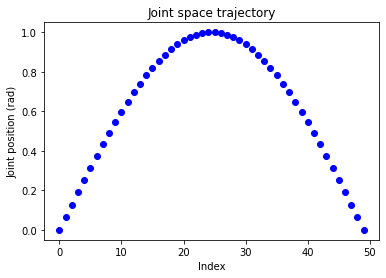

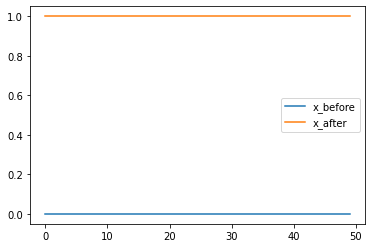

In [14]:
import matplotlib.pyplot as plt

# Number of steps in the trajectory
N = 50

# Define the joint space trajectory 
q = np.sin(np.linspace(0,1,N)*np.pi)
print(q)

# This plots the sequence q_1, ..., q_n
plt.plot(q, 'bo')
plt.title("Joint space trajectory")
plt.xlabel("Index")
plt.ylabel("Joint position (rad)")


# Instantiate `GeometricModel1R` object + use the animate function to visualize 
    ### 
    ### To be completed
    ###
geom1R = GeometricModel1R(2)
geom1R.animate(q)

# matrix

p = np.zeros((N,2))

plt.figure()
plt.plot(p[:,0], label='x_before')

for i in range(N):
    # use DGM here 
    p[i,:] = np.ones(2)

plt.plot(p[:,0], label='x_after')
plt.legend()
    # to fill out some vector p
    
# Calculate the sequence p_1, ..., p_n 
    ### 
    ### To be completed
    ###

# Plot the sequence p_1, ..., p_n (plot x and y separately)
    ### 
    ### To be completed
    ###


# 2R robot

Now you will have to derive the DGM and IGM of the 2R planar robot (2 links, 2 revolute joints) shown below.

In [15]:
# If full github repo has been downloaded locally, uncomment these lines
# from IPython.display import Image
# Image("2dof.png")

# Otherwise click on the link below to see the figure

<!-- For Colab NB -->
[2R robot (click here)](https://drive.google.com/file/d/1Pdow1aMbsOGwISPOVpTHg5suiEBJ0y4z/view?usp=sharing)

__Question__ : Derive the DGM of the 2R robot, i.e. express $p=(x_p,y_p)$ in terms of the joint positions $(q_1,q_2)$. What happens in the DGM when $q_1 = q_2 = 0$ ?

Hint: use [projections](https://en.wikipedia.org/wiki/Rotation_of_axes)

__Question__ : Derive the IGM of the 2R robot.

Hint: There exist at least $2$ methods to determine the IGM
- A geometric one using the [law of cosines](https://www.mathsisfun.com/algebra/trig-cosine-law.html), 
- An algebraic one (play around with the DGM equations)

__Question__ : How many solutions $q=(q_1,q_2)$ are there given some $p=(x_p,y_p)$ ? 

Hint: There are $3$ cases depending on the value of $p$

__Question__ : Write the GeometricModel2R class (complete the code below)

In [16]:
# Class for the geometric model of the 2R robot
class GeometricModel2R:
    '''
    Environment class for the geometric model of the 1R robot
    '''
    
    def __init__(self, L1, L2):
        ''' 
        To be completed
        '''
        
    def DGM(self, q):
        '''
        Implement here your DGM 
        '''

    def IGM(self, p):
        '''
        Implement here your IGM
        '''

    def animate(self, q):
        '''
        Simulate the 2R robot using DGM 
        Input : sequence of joint positions [q1, ..., q2]
        '''
        fig = plt.figure()
        ax = plt.axes(xlim=(-self.L1 -1, self.L1 + 1), ylim=(-self.L2 -1, self.L2 + 1))
        text_str = "2R robot animation"
        link1, = ax.plot([], [], lw=4)
        link2, = ax.plot([], [], lw=4)
        base, = ax.plot([], [], 'o', color='black')
        endeff, = ax.plot([], [], 'o', color='pink')
        def init():
            link1.set_data([], [])
            link2.set_data([], [])
            base.set_data([], [])
            endeff.set_data([], [])
            return link1, link2, base, endeff
        def animate(i):
            p = self.DGM(q[:,i])
            x = p[0] 
            y = p[1] 
            link1.set_data([0,self.L1*np.cos(q[0,i])], [0,self.L1*np.sin(q[0,i])])
            link2.set_data([self.L1*np.cos(q[0,i]),x], [self.L1*np.sin(q[0,i]),y])
            base.set_data([0, 0])
            endeff.set_data([x, y])
            return link1, link2, base, endeff
        props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
        ax.text(0.05, 0.95, text_str, transform=ax.transAxes, fontsize=15,
        verticalalignment='top', bbox=props)
        ax.grid()
        anim = FuncAnimation(fig, animate, init_func=init,
                                       frames=np.shape(q)[1], interval=25, blit=True)
        plt.close(fig)
        plt.close(anim._fig)
        IPython.display.display_html(IPython.core.display.HTML(anim.to_html5_video()))

__Question__ : Now generate trajectories of your choice in the joint space (for instance you can define sines for $q_1,q_2$ as for the 1R example, but feel free to try out different trajectories). Plot them as done before, and calculate and plot the corresponding endeffector trajectory using the DGM you implemented in the `GeometricModel2R` class.

__Question__ : The other way around, now plot an end-effector trajectory you choose, calculate and plot the corresponding joint trajectories. 

In this notebook we've introduced the concepts of joint space and task space. We derived and implemented the geometric model of the 1R and 2R robots. This description is "static", in a sense that it doesn't take into account velocities. The next notebook introduces the kinematic model, which relates velocities in the joint space to end-effector velocities in the task space.